# <h1 style="text-align: center;">Traffic Sign Detection</h1>

### Importing libraries:

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.layers import Dropout, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D

import cv2
from sklearn.model_selection import train_test_split
import pickle
import os
import pandas as pd
import random
from tensorflow.keras.preprocessing.image import ImageDataGenerator


### Defining Parameters 

In [3]:
path = "myData" # folder with all the class folders
labelFile = 'labels.csv' # file with all names of classes
batch_size_val=50  # how many to process together
steps_per_epoch_val=2000
epochs_val=30
imageDimesions = (32,32,3)
testRatio = 0.2    # if 1000 images split will 200 for testing
validationRatio = 0.2 # if 1000 images 20% of remaining 800 will be 160 for validation

### Importing Images

In [4]:
count = 0
images = []
classNo = []
myList = os.listdir(path)
print("Total Classes Detected:",len(myList))
noOfClasses=len(myList)
print("Importing Classes.....")
for x in range (0,len(myList)):
    myPicList = os.listdir(path+"/"+str(count))
    for y in myPicList:
        curImg = cv2.imread(path+"/"+str(count)+"/"+y)
        images.append(curImg)
        classNo.append(count)
    print(count, end =" ")
    count +=1
print(" ")
images = np.array(images)
classNo = np.array(classNo)

Total Classes Detected: 43
Importing Classes.....
0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42  


### Splitting Data

In [5]:
X_train, X_test, y_train, y_test = train_test_split(images, classNo, test_size=testRatio)
X_train, X_validation, y_train, y_validation = train_test_split(X_train, y_train, test_size=validationRatio)
 
# X_train = ARRAY OF IMAGES TO TRAIN
# y_train = CORRESPONDING CLASS ID

#### Checking if number of images matches to number of labels for each data set

In [6]:
print("Data Shapes")

print("Train",end = "");
print(X_train.shape,y_train.shape)

print("Validation",end = "");
print(X_validation.shape,y_validation.shape)

print("Test",end = "");
print(X_test.shape,y_test.shape)

assert(X_train.shape[0]==y_train.shape[0]), "The number of images in not equal to the number of lables in training set"

assert(X_validation.shape[0]==y_validation.shape[0]), "The number of images in not equal to the number of lables in validation set"

assert(X_test.shape[0]==y_test.shape[0]), "The number of images in not equal to the number of lables in test set"

assert(X_train.shape[1:]==(imageDimesions))," The dimesions of the Training images are wrong "

assert(X_validation.shape[1:]==(imageDimesions))," The dimesionas of the Validation images are wrong "

assert(X_test.shape[1:]==(imageDimesions))," The dimesionas of the Test images are wrong"

Data Shapes
Train(22271, 32, 32, 3) (22271,)
Validation(5568, 32, 32, 3) (5568,)
Test(6960, 32, 32, 3) (6960,)


### READ CSV FILE

In [7]:
data=pd.read_csv(labelFile)
print("data shape ",data.shape,type(data))

data shape  (43, 2) <class 'pandas.core.frame.DataFrame'>


### Displaying some samples images  of all the classes

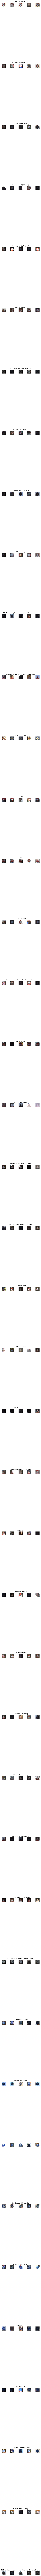

In [8]:
num_of_samples = []
cols = 5
num_classes = noOfClasses
fig, axs = plt.subplots(nrows=num_classes, ncols=cols, figsize=(5, 300))
fig.tight_layout()
for i in range(cols):
    for j,row in data.iterrows():
        x_selected = X_train[y_train == j]
        axs[j][i].imshow(x_selected[random.randint(0, len(x_selected)- 1), :, :], cmap=plt.get_cmap("gray"))
        axs[j][i].axis("off")
        if i == 2:
            axs[j][i].set_title(str(j)+ "-"+row["Name"])
            num_of_samples.append(len(x_selected))

#### Display a bar chart showing no of samples for each category

[112, 1270, 1303, 796, 1123, 1063, 243, 833, 812, 864, 1151, 735, 1234, 1219, 441, 333, 229, 629, 704, 113, 182, 172, 214, 287, 160, 875, 333, 142, 292, 160, 250, 447, 126, 375, 206, 694, 189, 116, 1198, 190, 195, 128, 133]


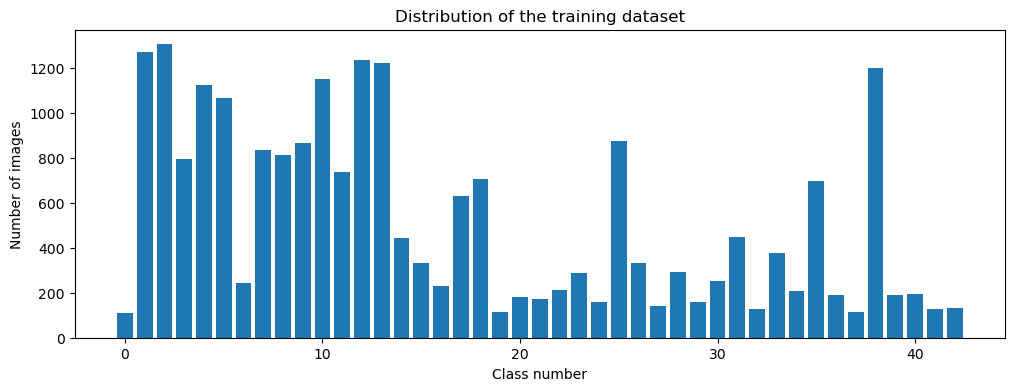

In [9]:
print(num_of_samples)
plt.figure(figsize=(12, 4))
plt.bar(range(0, num_classes), num_of_samples)
plt.title("Distribution of the training dataset")
plt.xlabel("Class number")
plt.ylabel("Number of images")
plt.show()

### Preprocessing images 

In [10]:
def grayscale(img):
    if len(img.shape) == 3:  # Check if the image has 3 channels (i.e., BGR)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    return img

def equalize(img):
    # Ensure the image is of type uint8 for equalizeHist
    img = np.uint8(img)
    img =cv2.equalizeHist(img)
    return img

def preprocessing(img):
    img = grayscale(img)     # CONVERT TO GRAYSCALE
    img = equalize(img)      # STANDARDIZE THE LIGHTING IN AN IMAGE
    img = img/255.0            # TO NORMALIZE VALUES BETWEEN 0 AND 1 INSTEAD OF 0 TO 255
    return img
 
X_train=np.array(list(map(preprocessing,X_train)))  # TO IRETATE AND PREPROCESS ALL IMAGES
X_validation=np.array(list(map(preprocessing,X_validation)))
X_test=np.array(list(map(preprocessing,X_test)))

random_index = random.randint(0, len(X_train) - 1)
cv2.imshow("GrayScale Image", X_train[random_index]) # TO CHECK IF THE TRAINING IS DONE PROPERLY

#### Add depth of 1

In [11]:
X_train=X_train.reshape(X_train.shape[0],X_train.shape[1],X_train.shape[2],1)

X_validation=X_validation.reshape(X_validation.shape[0],X_validation.shape[1],X_validation.shape[2],1)

X_test=X_test.reshape(X_test.shape[0],X_test.shape[1],X_test.shape[2],1)
 

### Augmentataion Of Images: To Make it More Generic 

X_train shape: (22271, 32, 32, 1)
y_train shape: (22271,)
X_validation shape: (5568, 32, 32, 1)
y_validation shape: (5568,)
X_test shape: (6960, 32, 32, 1)
y_test shape: (6960,)
y_train shape after conversion: (22271, 43)
y_validation shape after conversion: (5568, 43)
y_test shape after conversion: (6960, 43)


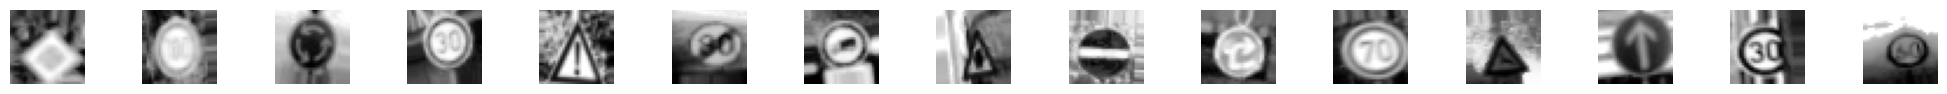

In [12]:
# Assuming X_train, y_train, X_validation, y_validation, X_test, y_test are correctly loaded

# Check the shapes of data and labels
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_validation shape:", X_validation.shape)
print("y_validation shape:", y_validation.shape)
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)

# Ensure y_train matches the number of images in X_train
if X_train.shape[0] != y_train.shape[0]:
    raise ValueError(f"Number of images and labels do not match. X_train has {X_train.shape[0]} samples, but y_train has {y_train.shape[0]} labels.")

# Ensure y_validation and y_test match their corresponding image arrays
if X_validation.shape[0] != y_validation.shape[0]:
    raise ValueError(f"Number of validation images and labels do not match. X_validation has {X_validation.shape[0]} samples, but y_validation has {y_validation.shape[0]} labels.")
    
if X_test.shape[0] != y_test.shape[0]:
    raise ValueError(f"Number of test images and labels do not match. X_test has {X_test.shape[0]} samples, but y_test has {y_test.shape[0]} labels.")

# Convert labels to categorical format
y_train = to_categorical(y_train, num_classes=noOfClasses)
y_validation = to_categorical(y_validation, num_classes=noOfClasses)
y_test = to_categorical(y_test, num_classes=noOfClasses)

# Check shapes after conversion
print("y_train shape after conversion:", y_train.shape)
print("y_validation shape after conversion:", y_validation.shape)
print("y_test shape after conversion:", y_test.shape)

# Define ImageDataGenerator and fit on X_train
dataGen = ImageDataGenerator(
    width_shift_range=0.1,
    height_shift_range=0.1,
    zoom_range=0.2,
    shear_range=0.1,
    rotation_range=10
)

dataGen.fit(X_train)

# Create a data generator for the training data
train_generator = dataGen.flow(X_train, y_train, batch_size=20)

# Example usage of the data generator
X_batch, y_batch = next(train_generator)

# Display augmented image samples
fig, axs = plt.subplots(1, 15, figsize=(20, 5))
fig.tight_layout()

for i in range(15):
    axs[i].imshow(X_batch[i].reshape(X_train.shape[1], X_train.shape[2]), cmap='gray')
    axs[i].axis('off')
plt.show()

## <h1 style="text-align: center;">Convolutional Neural Network</h1>

In [13]:
def myModel():
    no_Of_Filters = 60
    size_of_Filter = (5, 5)  # Kernel size
    size_of_Filter2 = (3, 3)
    size_of_pool = (2, 2)  # Pooling size
    no_Of_Nodes = 500  # Number of nodes in hidden layers

    model = Sequential()
    # First Conv layer with input shape
    model.add(Conv2D(no_Of_Filters, size_of_Filter, input_shape=(imageDimesions[0], imageDimesions[1], 1), activation='relu'))
    model.add(Conv2D(no_Of_Filters, size_of_Filter, activation='relu'))
    model.add(MaxPooling2D(pool_size=size_of_pool))

    # Additional Conv layers
    model.add(Conv2D(no_Of_Filters // 2, size_of_Filter2, activation='relu'))
    model.add(Conv2D(no_Of_Filters // 2, size_of_Filter2, activation='relu'))
    model.add(MaxPooling2D(pool_size=size_of_pool))
    model.add(Dropout(0.5))

    # Fully connected layers
    model.add(Flatten())
    model.add(Dense(no_Of_Nodes, activation='relu'))
    model.add(Dropout(0.5))
    
    # Output layer
    model.add(Dense(noOfClasses, activation='softmax'))

    # Compile the model with the correct learning rate argument
    model.compile(Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])
    return model


### TRAIN

In [14]:
# Ensure model definition is correct
model = myModel()
print(model.summary())

# Calculate steps_per_epoch based on batch size and number of training samples
steps_per_epoch = len(X_train) // batch_size_val

# Train the model
history = model.fit(
    dataGen.flow(X_train, y_train, batch_size=batch_size_val), 
    steps_per_epoch=steps_per_epoch, 
    epochs=epochs_val, 
    validation_data=(X_validation, y_validation), 
    shuffle=True
)


C:\Users\Hp\anaconda3\lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 28, 28, 60)          │           1,560 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 24, 24, 60)          │          90,060 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 12, 12, 60)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 10, 10, 30)          │          16,230 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 8, 8, 30)            │           8,130 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 4, 4, 30)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 4, 4, 30)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 480)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 500)                 │         240,500 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 500)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 43)                  │          21,543 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 378,023 (1.44 MB)

 Trainable params: 378,023 (1.44 MB)

 Non-trainable params: 0 (0.00 B)

None
Epoch 1/30


C:\Users\Hp\anaconda3\lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


445/445 ━━━━━━━━━━━━━━━━━━━━ 90s 194ms/step - accuracy: 0.1395 - loss: 3.2076 - val_accuracy: 0.7254 - val_loss: 0.9683
Epoch 2/30
  1/445 ━━━━━━━━━━━━━━━━━━━━ 1:16 172ms/step - accuracy: 0.3800 - loss: 1.8402

C:\Users\Hp\anaconda3\lib\contextlib.py:137: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


445/445 ━━━━━━━━━━━━━━━━━━━━ 6s 12ms/step - accuracy: 0.3800 - loss: 1.8402 - val_accuracy: 0.7223 - val_loss: 1.0046
Epoch 3/30
445/445 ━━━━━━━━━━━━━━━━━━━━ 92s 205ms/step - accuracy: 0.5497 - loss: 1.4889 - val_accuracy: 0.9070 - val_loss: 0.3568
Epoch 4/30
445/445 ━━━━━━━━━━━━━━━━━━━━ 6s 14ms/step - accuracy: 0.6200 - loss: 1.0721 - val_accuracy: 0.9045 - val_loss: 0.3528
Epoch 5/30
445/445 ━━━━━━━━━━━━━━━━━━━━ 90s 201ms/step - accuracy: 0.7203 - loss: 0.9002 - val_accuracy: 0.9503 - val_loss: 0.1958
Epoch 6/30
445/445 ━━━━━━━━━━━━━━━━━━━━ 6s 14ms/step - accuracy: 0.8600 - loss: 0.5180 - val_accuracy: 0.9504 - val_loss: 0.1964
Epoch 7/30
445/445 ━━━━━━━━━━━━━━━━━━━━ 83s 186ms/step - accuracy: 0.7942 - loss: 0.6616 - val_accuracy: 0.9666 - val_loss: 0.1206
Epoch 8/30
445/445 ━━━━━━━━━━━━━━━━━━━━ 6s 14ms/step - accuracy: 0.8000 - loss: 0.4720 - val_accuracy: 0.9644 - val_loss: 0.1228
Epoch 9/30
445/445 ━━━━━━━━━━━━━━━━━━━━ 85s 190ms/step - accuracy: 0.8310 - loss: 0.5418 - val_accurac

### PLOT

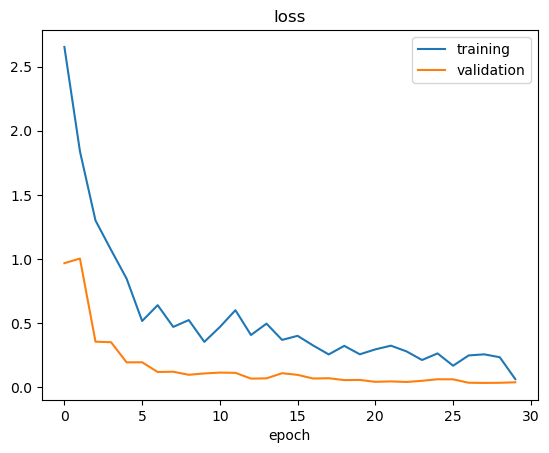

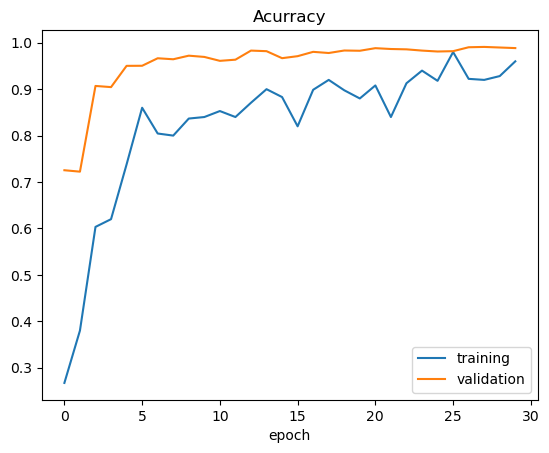

Test Score: 0.04179265722632408
Test Accuracy: 0.9887930750846863


In [15]:

plt.figure(1)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['training','validation'])
plt.title('loss')
plt.xlabel('epoch')
plt.figure(2)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['training','validation'])
plt.title('Acurracy')
plt.xlabel('epoch')
plt.show()
score =model.evaluate(X_test,y_test,verbose=0)
print('Test Score:',score[0])
print('Test Accuracy:',score[1])
 

In [18]:
from keras.models import load_model

# Replace with your model training code
# ...

# Save the trained model
try:
    print("Starting to save the model...")
    model.save("model_trained.h5")
    print("Model saved successfully as 'model_trained.h5'")
except Exception as e:
    print(f"An error occurred while saving the model: {e}")


Starting to save the model...
Model saved successfully as 'model_trained.h5'
